In [1]:
import numpy as np
import pandas as pd

In [2]:
premonitory = pd.read_csv(r"..\data\earthquakes_and_premonitory.csv")

In [3]:
premonitory.head()

,Unnamed: 0,significance,magnitudo,state,longitude,latitude,depth,date,n_tremors 14 days,avg_magn_of_ptremors 14 days,...,avg_sign_of_ptremors 4 days,n_tremors 3 days,avg_magn_of_ptremors 3 days,avg_sign_of_ptremors 3 days,n_tremors 2 days,avg_magn_of_ptremors 2 days,avg_sign_of_ptremors 2 days,n_tremors 1 days,avg_magn_of_ptremors 1 days,avg_sign_of_ptremors 1 days
0,3352677,720,6.8,Tonga,-172.9867,-15.3497,38.00,2022-12-04 19:24:15.394000+00:00,0,NaN,...,298.0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
1,3355419,711,6.0,Mexico,-100.5300,17.1801,18.00,2022-12-11 14:31:29.051000+00:00,0,NaN,...,298.0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
2,3356538,611,6.3,Aleutian Islands,178.5971,51.6079,73.00,2022-12-14 18:40:26.898000+00:00,0,NaN,...,298.0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
3,3358871,1780,6.4,California,-124.4230,40.5250,17.91,2022-12-20 10:34:24.770000+00:00,0,NaN,...,298.0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
4,3364736,564,6.0,Afghanistan,70.7455,36.4738,203.00,2023-01-05 14:25:53.019000+00:00,0,NaN,...,298.0,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN


In [4]:
premonitory_full = premonitory.copy()
premonitory_full.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
premonitory_full.columns

Index(['ID', 'significance', 'magnitudo', 'state', 'longitude', 'latitude',
       'depth', 'date', 'n_tremors 14 days', 'avg_magn_of_ptremors 14 days',
       'avg_sign_of_ptremors 14 days', 'n_tremors 13 days',
       'avg_magn_of_ptremors 13 days', 'avg_sign_of_ptremors 13 days',
       'n_tremors 12 days', 'avg_magn_of_ptremors 12 days',
       'avg_sign_of_ptremors 12 days', 'n_tremors 11 days',
       'avg_magn_of_ptremors 11 days', 'avg_sign_of_ptremors 11 days',
       'n_tremors 10 days', 'avg_magn_of_ptremors 10 days',
       'avg_sign_of_ptremors 10 days', 'n_tremors 9 days',
       'avg_magn_of_ptremors 9 days', 'avg_sign_of_ptremors 9 days',
       'n_tremors 8 days', 'avg_magn_of_ptremors 8 days',
       'avg_sign_of_ptremors 8 days', 'n_tremors 7 days',
       'avg_magn_of_ptremors 7 days', 'avg_sign_of_ptremors 7 days',
       'n_tremors 6 days', 'avg_magn_of_ptremors 6 days',
       'avg_sign_of_ptremors 6 days', 'n_tremors 5 days',
       'avg_magn_of_ptremors 5 days'

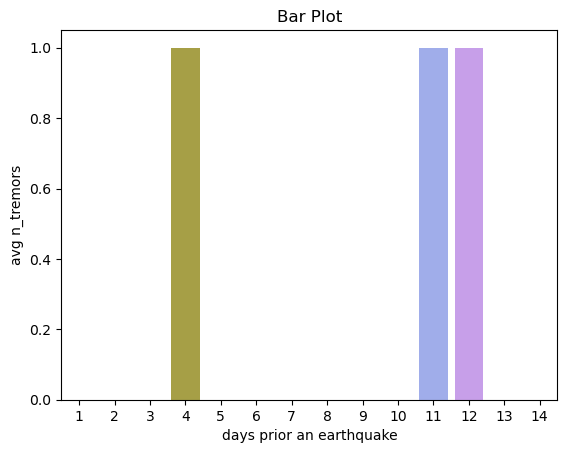

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

categ = np.array([n for n in range(1,15)])
values = [np.mean(premonitory_full["n_tremors {} days".format(i)]) for i in range(1,15)]
sns.barplot(x=categ, y=values)
plt.xlabel('days prior an earthquake')
plt.ylabel('avg n_tremors')
plt.title('Bar Plot')
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

y = premonitory_full.magnitudo
X = data_bloxplots

rf_regressor = RandomForestRegressor()

cv_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = np.mean(cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

Mean Cross-Validation Score: -0.21203111044921888


In [ ]:
from sklearn.cluster import KMeans
X_1 = premonitory_full.loc[:,["latitude","longitude"]]
kmeans = KMeans(n_clusters = 4, random_state = 0)
X_1["Cluster"] = kmeans.fit_predict(X_1)
X_1["Cluster"] = X_1["Cluster"].astype("category")
plot = sns.relplot(
    x = "longitude", y = "latitude", hue = "Cluster", data = X_1, palette = "bright", height = 6, aspect = 2
)
plot.ax.grid(True)

img = plt.imread("C:/Users/DIEGO MEZA/OneDrive/Documentos/Project_Earthquakes/map.jpg")
#img_extent = [X_1["longitude"].min(), X_1["longitude"].max(), X_1["latitude"].min(), X_1["latitude"].max()]
img_extent = [-180,180,80,-80]
plot.ax.imshow(img, extent=img_extent, aspect="auto", zorder=-1)

custom_yticks = [-90, -80, -60, -40, -20, 0, 20, 40, 60, 80, 90]
custom_xticks = [-180, -160, -140, -120, -100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
plot.ax.set_xticks(custom_xticks)
plot.ax.set_yticks(custom_yticks)

plt.show()

In [ ]:
premonitory_full["location_cluster"] = X_1.Cluster
premonitory_full.columns

In [ ]:
features = premonitory_full[['location_cluster', 'nTremors_1_days_earlier',
       'nTremors_2_days_earlier', 'nTremors_3_days_earlier',
       'nTremors_4_days_earlier', 'nTremors_5_days_earlier',
       'nTremors_6_days_earlier', 'nTremors_7_days_earlier',]]
target = premonitory_full.magnitudo

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

# Crear un pipeline con escalado y modelo
model1 = make_pipeline(scaler1, LinearRegression())
model2 = make_pipeline(scaler1, RandomForestRegressor())
model3 = make_pipeline(scaler2, Ridge())
model4 = make_pipeline(scaler1, GradientBoostingRegressor())

# Realizar validación cruzada
cv_scores = cross_val_score(model3, features, target, cv=5, scoring='r2')

# Imprimir los resultados de la validación cruzada
print("Cross-validated R2 Scores:", cv_scores)
print("Mean R2 Score:", cv_scores.mean())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x1_data = earthquakes_and_premonitory_2["Number_of_Tremors_1days"]
x3_data = earthquakes_and_premonitory_2["Number_of_Tremors_3days"]
x5_data = earthquakes_and_premonitory_2["Number_of_Tremors_5days"]
x7_data = earthquakes_and_premonitory_2["Number_of_Tremors_7days"]
y_data = earthquakes_and_premonitory_2["magnitudo"]

plt.figure(figsize=(10, 6))

# Subgráfico 1
plt.subplot(2, 2, 1)
plt.scatter(x1_data, y_data)
m1, b1 = np.polyfit(x1_data, y_data, 1)
plt.plot(x1_data, m1 * np.array(x1_data) + b1, color='red')
plt.title('Gráfico 1')
plt.xlabel('Eje X1')
plt.ylabel('Eje Y1')

# Subgráfico 2
plt.subplot(2, 2, 2)
plt.scatter(x3_data, y_data)
m3, b3 = np.polyfit(x3_data, y_data, 1)
plt.plot(x3_data, m3 * np.array(x3_data) + b3, color='red')
plt.title('Gráfico 2')
plt.xlabel('Eje X2')
plt.ylabel('Eje Y2')

# Subgráfico 3
plt.subplot(2, 2, 3)
plt.scatter(x5_data, y_data)
m5, b5 = np.polyfit(x5_data, y_data, 1)
plt.plot(x5_data, m5 * np.array(x5_data) + b5, color='red')
plt.title('Gráfico 3')
plt.xlabel('Eje X3')
plt.ylabel('Eje Y3')

# Subgráfico 4
plt.subplot(2, 2, 4)
plt.scatter(x7_data, y_data)
m7, b7 = np.polyfit(x7_data, y_data, 1)
plt.plot(x7_data, m7 * np.array(x7_data) + b7, color='red')
plt.title('Gráfico 4')
plt.xlabel('Eje X4')
plt.ylabel('Eje Y4')

# Ajustar diseño y mostrar la figura
plt.tight_layout()
plt.show()

In [ ]:
x1_data = earthquakes_and_premonitory_2["Avg_Magnitude_1days"]
x3_data = earthquakes_and_premonitory_2["Avg_Magnitude_3days"]
x5_data = earthquakes_and_premonitory_2["Avg_Magnitude_5days"]
x7_data = earthquakes_and_premonitory_2["Avg_Magnitude_7days"]
y_data = earthquakes_and_premonitory_2["magnitudo"]

plt.figure(figsize=(10, 6))

# Subgráfico 1
plt.subplot(2, 2, 1)
plt.scatter(x1_data, y_data)
m1, b1 = np.polyfit(x1_data, y_data, 1)
plt.plot(x1_data, m1 * np.array(x1_data) + b1, color='red')
plt.title('Gráfico 1')
plt.xlabel('Eje X1')
plt.ylabel('Eje Y1')

# Subgráfico 2
plt.subplot(2, 2, 2)
plt.scatter(x3_data, y_data)
m3, b3 = np.polyfit(x3_data, y_data, 1)
plt.plot(x3_data, m3 * np.array(x3_data) + b3, color='red')
plt.title('Gráfico 2')
plt.xlabel('Eje X2')
plt.ylabel('Eje Y2')

# Subgráfico 3
plt.subplot(2, 2, 3)
plt.scatter(x5_data, y_data)
m5, b5 = np.polyfit(x5_data, y_data, 1)
plt.plot(x5_data, m5 * np.array(x5_data) + b5, color='red')
plt.title('Gráfico 3')
plt.xlabel('Eje X3')
plt.ylabel('Eje Y3')

# Subgráfico 4
plt.subplot(2, 2, 4)
plt.scatter(x7_data, y_data)
m7, b7 = np.polyfit(x7_data, y_data, 1)
plt.plot(x7_data, m7 * np.array(x7_data) + b7, color='red')
plt.title('Gráfico 4')
plt.xlabel('Eje X4')
plt.ylabel('Eje Y4')

# Ajustar diseño y mostrar la figura
plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = earthquakes_and_premonitory_2.drop(columns = ['date','state']).corr()
sns.set(style="whitegrid")  # Configuración del estilo del gráfico
plt.figure(figsize=(10, 8))  # Tamaño de la figura

# Crear el heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()